# Dataset Story

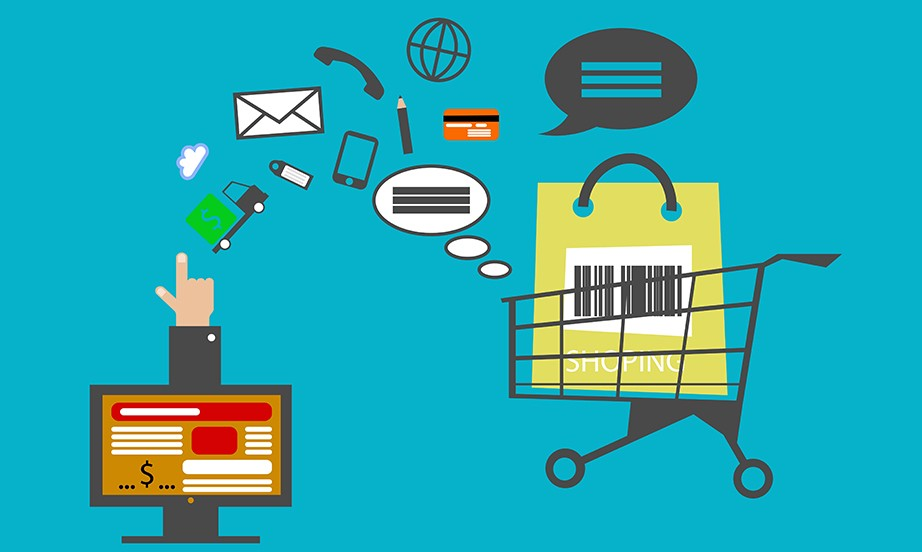

The dataset named Online Retail II includes the sales of an UK-based online store between 01/12/2009 - 09/12/2010.

The product catalog of this company includes souvenirs.
The vast majority of the company's customers are corporate customers. 

# Loading Related Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from warnings import filterwarnings
filterwarnings('ignore')

# Dataset Display Settings

In [72]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format',lambda x: '%.3f' % x)
pd.set_option('display.width',500)

# Let's Get To Know The Dataset

In [73]:
df_=pd.read_excel('online_retail_II.xlsx')

In [4]:
df=df_.copy()

In [5]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
10893,490284,35969,FOLKART CROWN TABLE DECORATIONS,12,2009-12-04 12:54:00,1.650,14979.000,United Kingdom
100734,498905,47579,TEA TIME BREAKFAST BASKET,2,2010-02-23 14:40:00,2.100,12854.000,United Kingdom
241285,512733,21846,PINK DIAMANTE PEN IN GIFT BOX,1,2010-06-17 13:48:00,4.210,NaN,United Kingdom
357567,524102,84631,FRUIT TREE AND BIRDS WALL PLAQUE,2,2010-09-27 12:45:00,7.950,17315.000,United Kingdom
399884,527655,84991,60 TEATIME FAIRY CAKE CASES,1,2010-10-18 14:07:00,0.550,13387.000,United Kingdom
291705,517815,21914,BLUE HARMONICA IN BOX,12,2010-08-02 11:46:00,1.250,14152.000,United Kingdom
225135,511123,21688,SILVER PLATE CANDLE BOWL SMALL,6,2010-06-07 10:56:00,2.950,17673.000,United Kingdom
213875,510148,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-05-27 12:50:00,0.850,16101.000,United Kingdom
480231,534404,21908,CHOCOLATE THIS WAY METAL SIGN,2,2010-11-22 14:08:00,2.100,14048.000,United Kingdom
250719,513607,22087,PAPER BUNTING WHITE LACE,40,2010-06-27 11:59:00,2.550,13802.000,United Kingdom


## About The Datasets

In [6]:
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]),end="\n\n")
print("Names of variables in the dataset:" )
for col in df.columns:
      print(col,end="  ")
print(end="\n\n")
print("Index information in the dataset:" )
print(df.index,end="\n\n")
print("Data type of variables in dataset :")
print(df.dtypes,end="\n\n")
print("Missing values of variables in the dataset: ")
print(df.isnull().sum(),end="\n\n")
print("The total number of missing values in the dataset: ")
print(df.isnull().sum().sum(),end="\n\n")
print("Memory usage of label values (index/columns) in the dataset: " )
print(df.memory_usage())

The dataset has 525461 rows and 8 columns.

Names of variables in the dataset:
Invoice  StockCode  Description  Quantity  InvoiceDate  Price  Customer ID  Country  

Index information in the dataset:
RangeIndex(start=0, stop=525461, step=1)

Data type of variables in dataset :
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Missing values of variables in the dataset: 
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

The total number of missing values in the dataset: 
110855

Memory usage of label values (index/columns) in the dataset: 
Index              128
Invoice        4203688
StockCode      4203688
Description    4203688
Quantity       420

# Let's Get to Know the Variables 

- **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).
- **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal. The name of the country where a customer resides.

## Variables Classification

In [7]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    # Categorical Variables
    
    cat_cols=[i for i in dataframe.columns if dataframe[i].dtypes=='O']
    num_but_cat=[i for i in dataframe.columns if dataframe[i].dtypes!='O' and dataframe[i].nunique()<cat_th]
    cat_but_car=[i for i in dataframe.columns if dataframe[i].dtypes=='O' and dataframe[i].nunique()>car_th]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[i for i in cat_cols if i not in cat_but_car]
    
    # Continuous Variables
    
    num_cols=[i for i in dataframe.columns if dataframe[i].dtypes!='O']
    num_cols=[i for i in num_cols if i not in num_but_cat]
    
    print('Number of Observations : {}'.format(dataframe.shape[0]))
    print('Number of Variables    : {}'.format(dataframe.shape[1]))
    print('Number of Categorical Variables : {}'.format(len(cat_cols)))
    print('Number of Numerical Variables : {}'.format(len(num_cols)))
    print('Number of Numerical but Categorical Variables : {}'.format(len(num_but_cat)))
    print('Number of Categorical but Cardinal Variables : {}'.format(len(cat_but_car)))
    
    return cat_cols,num_cols,cat_but_car 

In [8]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)
print(end='\n\n')
print('Categorical Variables :',cat_cols,end='\n\n')
print('Continuous Variables  :',num_cols,end='\n\n')
print('Categorical but Cardinal  Variables :',cat_but_car,end='\n\n')

Number of Observations : 525461
Number of Variables    : 8
Number of Categorical Variables : 0
Number of Numerical Variables : 4
Number of Numerical but Categorical Variables : 0
Number of Categorical but Cardinal Variables : 4


Categorical Variables : []

Continuous Variables  : ['Quantity', 'InvoiceDate', 'Price', 'Customer ID']

Categorical but Cardinal  Variables : ['Invoice', 'StockCode', 'Description', 'Country']



- The Customer ID behaves like an index, so it cannot be scaled or converted in any way.<br>
  Continuous variables, on the other hand, are variables that can be scaled and transformed.
  
- The variable InvoiceDate consists of numeric characters but specifies a time.<br>
  Variables with time data type cannot be scaled or converted. 

In [10]:
num_cols=[i for i in num_cols if i not in ['Customer ID','InvoiceDate']]
num_cols

['Quantity', 'Price']

### Let's Examine Categorical Variables 

In [11]:
cat_cols

[]

There is no categorical variable in the data set. 

### Let's Examine Categorical but Cardinal Variables

In [12]:
cat_but_car

['Invoice', 'StockCode', 'Description', 'Country']

#### **Invoice**

- A unique numbered invoice is issued for each purchase behavior. 
- There may be more than one purchased product name in an invoice, so the unique invoice number may be repeated in the data set. 

In [19]:
print('Fatura basina satin alinan birim urun sayisi',end='\n\n')
df.groupby('Invoice')['Description'].count()

Fatura basina satin alinan birim urun sayisi



Invoice
489434       8
489435       4
489436      19
489437      23
489438      17
489439      19
489440       2
489441       4
489442      23
489443       7
489444       1
489445      19
489446      27
489447       1
489448       4
489450       9
489460      15
489461      26
489462      13
489463       1
489464       1
489465      19
489467       1
489488      30
489505      10
489514      32
489517      38
489519      38
489520      30
489521       0
489522     104
489523       1
489525       2
489526      44
489529      50
489531      14
489532      20
489533      22
489536     130
489537      59
489539      17
489540       5
489542       2
489544      14
489545      32
489546      33
489547      22
489548      55
489550      23
489552      25
489556      59
489557      21
489558       4
489559       8
489560      30
489561      27
489562      39
489564      14
489566       8
489567      20
489569      18
489571      30
489572      83
489573      32
489574      65
489575      22
48

##### **Types of Invoice**

In [30]:
num_label=[]
alphaNum_label=[]

for i in df['Invoice']:
    bool=str(i).isdigit()
    if bool ==True:
        if i not in num_label:
            num_label.append(i)
    else:
         if i not in alphaNum_label:
            alphaNum_label.append(i)

In [36]:
print('Number of invoice labels consisting of only numeric values :',len(num_label),end='\n\n')
print('Number of invoice labels consisting of numeric values and letters :',len(alphaNum_label))

Number of invoice labels consisting of only numeric values : 24221

Number of invoice labels consisting of numeric values and letters : 4595


In [37]:
len(df.groupby('Invoice')['Description'].count())==len(num_label)+len(alphaNum_label) ## Validation

True

In [38]:
alphaNum_label_I=[]
for i in alphaNum_label:
    for j in i:
        bool=str(j).isdigit()
        if  bool==False and j not in alphaNum_label_I:
             alphaNum_label_I.append(str(j))
alphaNum_label_I          

['C', 'A']

##### **Invoice A**

In [39]:
df.loc[df['Invoice'].str.contains('A',na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


A:Adjust --> Invoices labeled A represent customers in debt. 

##### **Invoice C**

In [40]:
print('Number of owner invoices labeled C  : ',len(df.loc[df['Invoice'].str.contains('C',na=False)]))

Number of owner invoices labeled C  :  10206


In [41]:
df.loc[df['Invoice'].str.contains('C',na=False),['Quantity','Price']].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,1])

,Quantity,Price
0.000,-9360.000,0.010
0.250,-6.000,1.650
0.500,-2.000,2.950
0.750,-1.000,6.750
0.900,-1.000,12.425
0.950,-1.000,16.950
0.990,-1.000,661.012
1.000,1.000,25111.090


When the descriptive statistics of the continuous variables of the C-labeled invoices are examined,

- All integers in the range of Minimum integer and Maximum integer of the number of products purchased ( Quantity ) are negative.<br>
  Observation units of the Quantity variable have a negative integer value: 
     - Cancellation of purchasing behavior 
     - Returning purchased products
     
means.

In [42]:
df.loc[(df['Invoice'].str.contains('C',na=False)) & (df['Quantity']>0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.570,NaN,United Kingdom


In [45]:
print('In invoices labeled C, there are ' + \
      str(len(df.loc[(df['Invoice'].str.contains('C',na=False)) & (df['Quantity']>0)]))+ \
      ' cases where the units of observation of the variable Quantity are positive integers')

In invoices labeled C, there are 1 cases where the units of observation of the variable Quantity are positive integers


In [46]:
print('In invoices labeled C, there are ' + \
      str(len(df.loc[(df['Invoice'].str.contains('C',na=False)) & (df['Quantity']<0)]))+ \
      ' cases where the units of observation of the variable Quantity are negative integers')

In invoices labeled C, there are 10205 cases where the units of observation of the variable Quantity are negative integers


In [47]:
len(df.loc[(df['Invoice'].str.contains('C',na=False)) & (df['Quantity']<0)]) +  \
len(df.loc[(df['Invoice'].str.contains('C',na=False)) & (df['Quantity']>0)]) == \
len(df.loc[df['Invoice'].str.contains('C',na=False)]) # Validation

True

#### **Stock Code - Description**

While a product may have only one option, it can also have more than one option.

For products with more than one option, the prefix is added to the observation units in the Description variable, while the suffix is added to the observation units in the StockCode variable. 

In [60]:
print('Unique number of products : ',df['StockCode'].nunique())

Unique number of products :  4632


In [469]:
one_of_a_kind=[]
more_of_a_kind=[]


for i in df['StockCode']:
    bool=str(i).isdigit()
    if bool ==True:
        if i not in one_of_a_kind:
            one_of_a_kind.append(i)
    else:
         if i not in more_of_a_kind:
            more_of_a_kind.append(i)

In [61]:
print(' Number of products with one option  : ' , len(one_of_a_kind))
print(' Number of products with more than one option  : ' , len(more_of_a_kind))

NameError: name 'one_of_a_kind' is not defined

In [471]:
df['StockCode'].nunique()==len(one_of_a_kind)+len(more_of_a_kind) # Validation

True

#### **Country**

In [62]:
print('Buying behavior from '+str(df['Country'].nunique())+' unique countries has taken place')

Buying behavior from 40 unique countries has taken place


##### **Toplam Satin Alma Davranisina Gore Ulkeler**

In [475]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom          4429046
Denmark                  227030
EIRE                     188704
Netherlands              181823
Germany                  107133
France                    74471
Sweden                    52238
Switzerland               22053
Australia                 20053
Spain                     18332
Belgium                   11980
Portugal                  11878
Channel Islands           10994
Norway                     7863
Italy                      7310
Japan                      6604
Austria                    6479
Greece                     6151
United Arab Emirates       5746
Cyprus                     4371
Finland                    3651
Unspecified                3416
Bermuda                    2798
USA                        2666
Thailand                   2552
Lithuania                  2306
Hong Kong                  2306
Poland                     1991
Singapore                  1753
RSA                        1618
Malta                      1547


### Let's Review Continuous/Numerical Variables

In [476]:
num_cols

['Quantity', 'Price']

In [477]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.000,10.338,107.424,-9600.000,1.000,3.000,10.000,19152.000
Price,525461.000,4.689,146.127,-53594.360,1.250,2.100,4.210,25111.090


#### **Price-Quantity**

In [478]:
df.loc[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


The case where the unit price of the product is a negative integer

- Explained by the presence of A-labeled units of observation of the variable Invoice .<br>
  Invoice numbers labeled A represented the debt status, therefore, the units of observation of the Price variable will also consist of negative integers. 

In [57]:
print('There are ' +str(len(df.loc[df['Quantity']==0]))+' cases where the observation units of the Quantity variable in invoices are zero.',end='\n\n')

print('Number of observation units where the product unit price is zero : ',len(df.loc[df['Price']==0]),end='\n\n')

print('Number of units of observation where the unit price of the product is zero and the number of products purchased is a positive integer : ',\
      len(df.loc[(df['Price']==0) & (df['Quantity']>0)]),end='\n\n')

print('Number of units of observation where the unit price of the product is zero and the number of products purchased is a negative integer:  ',\
      len(df.loc[(df['Price']==0) & (df['Quantity']<0)]))

There are 0 cases where the observation units of the Quantity variable in invoices are zero.

Number of observation units where the product unit price is zero :  3687

Number of units of observation where the unit price of the product is zero and the number of products purchased is a positive integer :  1566

Number of units of observation where the unit price of the product is zero and the number of products purchased is a negative integer:   2121


- The situation where the unit price of the product is zero and the number of purchased products is positive means that the product is a gift or a promotion. 
        
- The situation where the unit price of the product is zero and the number of products purchased is negative: It means that the product is damaged, defective, has bad quality, is colorless and is lost. 

In [58]:
print('Number of units of observation for which the unit price of the product is a positive integer  : ',len(df.loc[df['Price']>0]),end='\n\n')

print('Number of units of observation where the unit price of the product is a positive integer and the number of products purchased is a positive integer: ',\
      len(df.loc[(df['Price']>0) & (df['Quantity']>0)]),end='\n\n')

print('Number of units of observation where the unit price of the product is a positive integer and the number of products purchased is a negative integer: ',\
      len(df.loc[(df['Price']>0) & (df['Quantity']<0)]))

Number of units of observation for which the unit price of the product is a positive integer  :  521771

Number of units of observation where the unit price of the product is a positive integer and the number of products purchased is a positive integer:  511566

Number of units of observation where the unit price of the product is a positive integer and the number of products purchased is a negative integer:  10205


- The situation where the unit price of the product is a positive integer and the number of products purchased is positive: <br>

Indicates that the purchasing behavior has taken place. 
        
- The situation where the unit price of the product is a positive integer and the number of products purchased is negative: <br>

Indicates that the behavior of the product is returned, and the C-labeled observation units belonging to the Invoice variable. 




### Let's Examine the Target/Dependent/Output Variable

There is no target variable for the data set. 

# Missing Observation Units Analysis

In [481]:
print('Total number of missing observation units in the dataset : ', df.isnull().sum().sum(),end='\n\n')

Total number of missing observation units in the dataset :  110855



In [482]:
NaN_cols={i:[df[i].isnull().sum(),np.round((df[i].isnull().sum()/df.shape[0])*100, 2)] \
              for i in df.columns if df[i].isnull().sum()!=0}
print(NaN_cols,end='\n\n')
missing_values_df=pd.DataFrame(data=NaN_cols.values(),columns=['NaN_Count','Ratio'],index=NaN_cols.keys())
missing_values_df

{'Description': [2928, 0.56], 'Customer ID': [107927, 20.54]}



,NaN_Count,Ratio
Description,2928,0.560
Customer ID,107927,20.540


## Solve The Missing Observation Unit Problem

Considering the categorization of the customers who are the target of the business problem, missing observation units belonging to the customer identification number (Customer ID) should be deducted. 

In [483]:
len(df.loc[(df['Description'].isnull()) & (df['Customer ID'].isnull()) ])

2928

In cases where there are missing observation units in the Description variable in the data set, there are also missing observation units in the Customer ID variable. Thus, if we drop the missing observation units of the Customer ID variable, the missing observation units of the Description variable will also be dropped. 

In [484]:
df.dropna(subset=['Customer ID'],inplace=True)

In [59]:
print('Total number of missing observation units in the data set: ' ,df.isnull().sum().sum())

Total number of missing observation units in the data set:  110855


In [486]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,      9,
            ...
            525451, 525452, 525453, 525454, 525455, 525456, 525457, 525458, 525459, 525460], dtype='int64', length=417534)

In [487]:
df=df.reset_index(drop=True)

In [488]:
df.index

RangeIndex(start=0, stop=417534, step=1)

# RFM Metrics

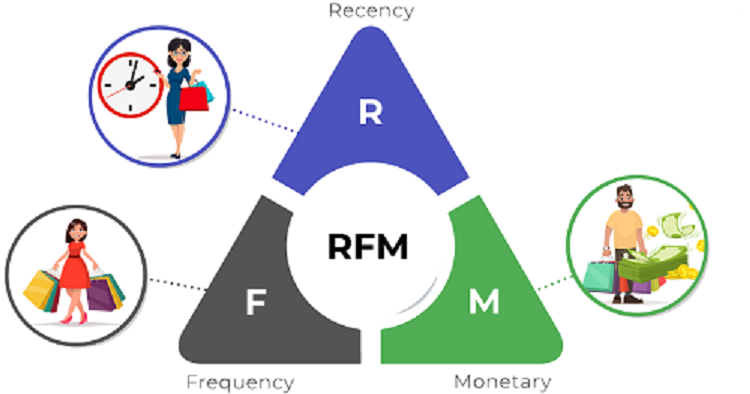

In [67]:
Image('RFM_Metrics.png')

## Recency

- It refers to the number of days that have passed over the recent purchase behavior of customers. 
- It seeks an answer to the question of how much time (days) has passed since the last invoice date to the customer. <br>
  The smaller the answer is, the more valuable the Recency metric is. 

Let's create today's date (latest date) according to the dataset. 

In [489]:
import datetime as dt

In [490]:
today_date=dt.datetime(df['InvoiceDate'].max().year,
                       df['InvoiceDate'].max().month,
                       df['InvoiceDate'].max().day)

In [491]:
today_date

datetime.datetime(2010, 12, 9, 0, 0)

## Frequency

- It refers to the number of times customers perform/repeat their purchasing behavior. 
- An answer is sought to the question of how many times customers have been invoiced. 
  The larger the integer value the answer is, the higher the Frequency metric becomes. 

## Monatery

- It refers to the total money spent by customers after all their purchasing behaviors. 

- Based on the purchasing behavior of customers 
    - Observation units of the Quantity variable are greater than 1 <br>
    - A positive integer of units of observation of the variable Price 
    
must be.

In [492]:
df.shape[0]

417534

In [493]:
df=df.loc[(df['Quantity']>1) & (df['Price']>0)]

In [494]:
df.shape[0]

327305

### **TotalPrice**

In [496]:
df['TotalPrice']=df['Quantity']*df['Price']

# RFM_DF

- A unique numbered invoice is issued for each purchase behavior of the customer. 
- The customer can perform more than one purchasing behavior, more than one unique invoice can be issued for the customer. 

In [497]:
rfm=df.groupby('Customer ID').agg({'InvoiceDate' : lambda x:(today_date-x.max()).days,
                                   'Invoice'     : lambda y:y.nunique(),
                                   'TotalPrice'  : lambda z:z.sum()})

In [498]:
rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','TotalPrice':'Monetary'},inplace=True)
#rfm.columns)['InvoiceDate','Invoice','TotalPrice']

## rfm_score

In [499]:
rfm['recency_score']=pd.qcut(rfm['Recency'],q=5,labels=[5,4,3,2,1])

In [500]:
rfm['frequency_score']=pd.qcut(rfm['Frequency'].rank(method='first'),q=5,labels=[1,2,3,4,5])

In [501]:
rfm['monatery_score']=pd.qcut(rfm['Monetary'],q=5,labels=[1,2,3,4,5])

There are 5 select and sort operations for each metric, but 125 select and sort operations for the RFM score.
Selecting and sorting 125 times will result in too many classes (categories) for the RFM score, which consists of only 3 variables (features). 


- Observation units less than 0 were dropped in the variable Quantity. 
- Observation units less than 0 were dropped in the variable Price. 

Therefore <br>
Each customer will potentially realize the buying behavior and generate returns for the company. 

For this reason, I will not use the Monetary metric when generating an RFM score. Of course, it's a matter of preference, personally, I find it appropriate to calculate 25 possibilities instead of calculating 125 possibilities according to the data set I have. You can also include the Monetary metric when you create your RFM score. 


In [502]:
rfm['rfm_score']=rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str)

In [503]:
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monatery_score,rfm_score
Customer ID,,,,,,,
17606.000,371,1,87.300,1,2,1,12
16532.000,65,2,2007.840,3,3,4,33
13198.000,21,2,1556.040,4,2,4,42
15100.000,0,6,2018.700,5,5,4,55
15848.000,255,1,43.800,1,1,1,11
15353.000,1,6,1998.440,5,5,4,55
15814.000,27,2,689.110,4,3,3,43
16876.000,37,1,86.340,3,2,1,32
12413.000,36,1,198.750,3,1,1,31


RFM scores between 11 and 55 will occur. 

## segment

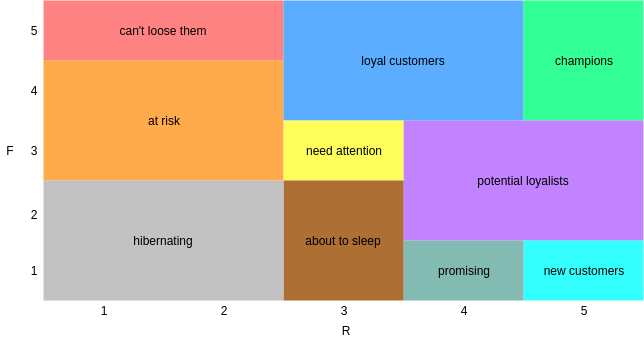

In [65]:
Image('RFM_Segments.png')

In [504]:
rfm.sort_values(by='rfm_score',ascending=False,inplace=True)

In [505]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [506]:
rfm['segment']=rfm['rfm_score'].replace(seg_map,regex=True)

In [507]:
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monatery_score,rfm_score,segment
Customer ID,,,,,,,,
17094.000,57,1,100.200,3,2,1,32,about_to_sleep
13578.000,43,1,135.220,3,1,1,31,about_to_sleep
17160.000,8,11,6691.130,5,5,5,55,champions
12422.000,28,11,3294.840,4,5,5,45,loyal_customers
13415.000,106,4,696.320,2,4,3,24,at_Risk
15251.000,48,10,9829.600,3,5,5,35,loyal_customers
15625.000,10,5,1702.140,5,4,4,54,champions
14871.000,127,5,531.420,2,4,3,24,at_Risk
17268.000,79,7,957.500,2,5,4,25,cant_loose


## Scaling for K-Means

In [514]:
from sklearn.preprocessing import MinMaxScaler

In [515]:
scaler=MinMaxScaler((0,1))

In [516]:
rfm_metrics=['Recency','Frequency']

In [517]:
rfm[rfm_metrics]=scaler.fit_transform(rfm[rfm_metrics])

In [518]:
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monatery_score,rfm_score,segment
Customer ID,,,,,,,,
16467.000,0.383,0.033,2869.160,2,5,5,25,cant_loose
17433.000,0.054,0.000,246.000,4,2,2,42,potential_loyalists
17949.000,0.016,0.396,51117.000,5,5,5,55,champions
15954.000,0.601,0.000,186.950,1,2,1,12,hibernating
16767.000,0.142,0.016,2484.250,3,4,5,34,loyal_customers
15826.000,0.544,0.000,943.970,1,1,4,11,hibernating
14677.000,0.609,0.000,184.910,1,1,1,11,hibernating
14938.000,0.528,0.005,2322.430,1,3,5,13,at_Risk
17199.000,0.582,0.000,144.270,1,2,1,12,hibernating


## Modelling

In [519]:
from sklearn.cluster import KMeans

### **Determining the Optimum Number of Clusters** 

In [520]:
from yellowbrick.cluster import KElbowVisualizer

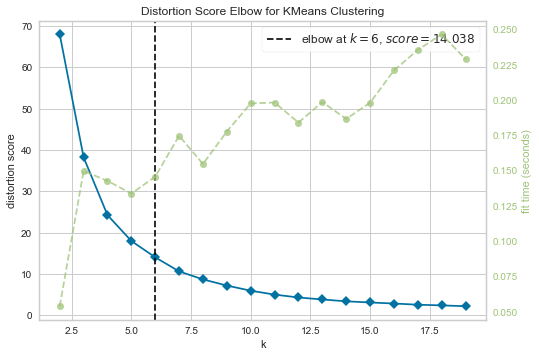

In [521]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm[rfm_metrics])
elbow.show();

In [522]:
print('Optimum küme sayisi : ',elbow.elbow_value_)

Optimum küme sayisi :  6


### **Tuning Model**

In [523]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(rfm[rfm_metrics])
clusters = kmeans.labels_

In [524]:
rfm['KMeans_Segment']=clusters

In [525]:
rfm.sample(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monatery_score,rfm_score,segment,KMeans_Segment
Customer ID,,,,,,,,,
18244.000,0.174,0.005,568.640,3,3,3,33,need_attention,4
16133.000,0.029,0.121,8002.170,5,5,5,55,champions,5
13723.000,0.072,0.016,990.550,4,4,4,44,loyal_customers,5
14021.000,0.024,0.016,1020.930,5,4,4,54,champions,5
16166.000,0.169,0.005,435.830,3,3,2,33,need_attention,4
17358.000,0.029,0.011,278.560,5,4,2,54,champions,5
15736.000,0.188,0.005,1776.120,2,3,4,23,at_Risk,4
16205.000,0.083,0.011,990.230,4,3,4,43,potential_loyalists,5
17568.000,0.718,0.000,374.310,1,2,2,12,hibernating,1


In [530]:
rfm.groupby(['KMeans_Segment']).agg({'KMeans_Segment': 'count'})

,KMeans_Segment
KMeans_Segment,
0,35
1,473
2,507
3,305
4,1122
5,1831


In [531]:
rfm.groupby(['segment']).agg({'segment': 'count'})

,segment
segment,
about_to_sleep,333
at_Risk,610
cant_loose,77
champions,660
hibernating,1010
loyal_customers,731
need_attention,198
new_customers,50
potential_loyalists,514


In [532]:
rfm[['segment','KMeans_Segment']]

,segment,KMeans_Segment
Customer ID,,
13267.000,champions,5
17707.000,champions,5
16700.000,champions,5
13534.000,champions,5
15005.000,champions,5
15002.000,champions,5
12921.000,champions,0
13542.000,champions,5
17044.000,champions,5


# If you want to interact with me


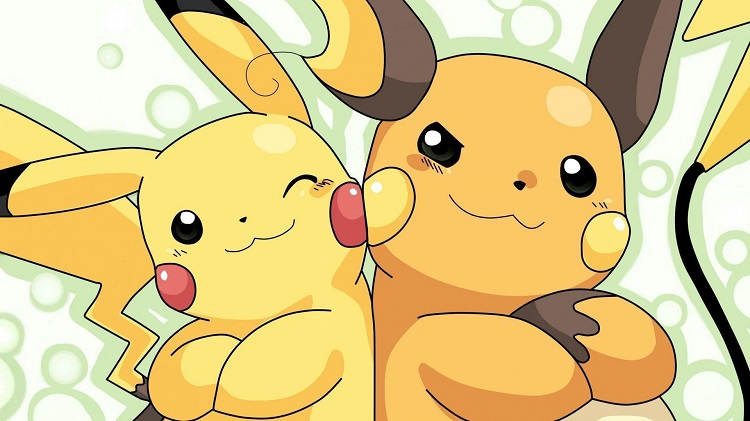

In [70]:
Image('Pikachu_Raichu.jpg')

**My LinkedIn Address** :

<a href="https://www.linkedin.com/in/ibrahim-turkoglu/">LinkedIn</a>

**My Medium   Address** :

<a href="https://medium.com/@trkglu.ibrahim">Medium</a>

**My Github   Address** :

<a href="https://github.com/ibrahimturkoglu">Github</a>

**My Kaggle  Address** :

<a href="https://www.kaggle.com/brahimtrkolu">Kaggle</a>